### Gaussian Mixture Models

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import *

from sklearn.mixture import GaussianMixture

In [45]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [47]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [48]:
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state= 42)

In [50]:
gmm = GaussianMixture(n_components=3)
gmm.fit(x_train)

GaussianMixture(n_components=3)

In [51]:
gmm.predict_proba(x_test)

array([[9.18133461e-001, 5.42816656e-082, 8.18665389e-002],
       [5.39360286e-044, 1.00000000e+000, 1.38399977e-051],
       [1.14153128e-019, 9.82454120e-258, 1.00000000e+000],
       [9.91018299e-001, 2.11627241e-082, 8.98170142e-003],
       [9.97392119e-001, 4.17437455e-098, 2.60788148e-003],
       [2.42900106e-033, 1.00000000e+000, 2.74718305e-045],
       [9.99996892e-001, 2.49261456e-045, 3.10773959e-006],
       [1.63920721e-012, 8.52145155e-147, 1.00000000e+000],
       [3.79839254e-002, 5.31711526e-090, 9.62016075e-001],
       [9.99993576e-001, 1.81887917e-054, 6.42392769e-006],
       [3.81690623e-004, 2.17073191e-126, 9.99618309e-001],
       [9.07521356e-032, 1.00000000e+000, 7.27460019e-040],
       [1.97043958e-043, 1.00000000e+000, 3.91333151e-054],
       [3.06003016e-033, 1.00000000e+000, 3.17626016e-040],
       [1.93715756e-045, 1.00000000e+000, 3.64448520e-050]])

In [52]:
pred = gmm.predict(x_train)
adjusted_rand_score(y_train, pred)

0.9339633019941928

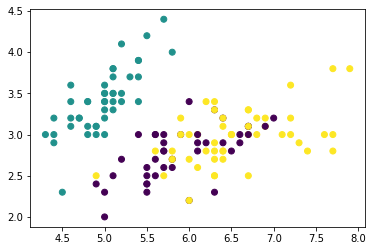

In [54]:
frame = pd.DataFrame(x_train)
frame['cluster'] = pred
plt.scatter(frame['sepal_length'], frame['sepal_width'], c=frame['cluster'])